In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score
%matplotlib inline

In [2]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [3]:
x = mnist['data'].values
y = mnist['target'].values


In [38]:
a = x[1]

a.shape

(784,)

In [39]:
a1 = a.reshape(28,28)
a1.shape

(28, 28)

<Figure size 864x720 with 0 Axes>

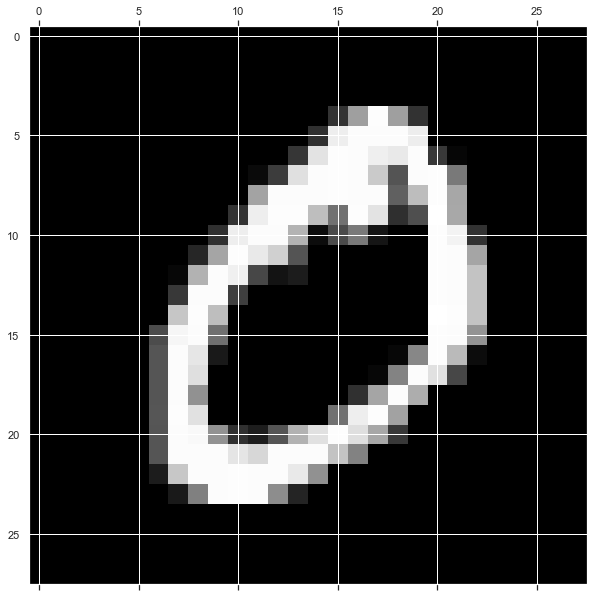

In [40]:
plt.gray()
plt.matshow(a1)

In [5]:
y = y.astype(np.uint8)

In [6]:
x_train, x_test, y_train, y_test = x[:60000], x[60000::], y[:60000], y[60000::]

In [7]:
from sklearn.linear_model import SGDClassifier
sc = SGDClassifier(random_state=42)
sc.fit(x_train, y_train)

SGDClassifier(random_state=42)

In [8]:
sc.predict([a])

array([3], dtype=uint8)

In [9]:
some_digit_scores = sc.decision_function([a])
r = np.where(some_digit_scores == max(some_digit_scores))[0][0]
r, some_digit_scores

(0,
 array([[-31893.03095419, -34419.69069632,  -9530.63950739,
           1823.73154031, -22320.14822878,  -1385.80478895,
         -26188.91070951, -16147.51323997,  -4604.35491274,
         -12050.767298  ]]))

In [10]:
from sklearn.multiclass import OneVsOneClassifier
ovo_clf = OneVsOneClassifier(SGDClassifier(random_state=42))
ovo_clf.fit(x_train, y_train)
ovo_clf.predict([a])

array([5], dtype=uint8)

In [11]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=42)
rf.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [12]:
rf.predict([a])

array([5], dtype=uint8)

In [13]:
rf.predict_proba([a])

array([[0.  , 0.  , 0.01, 0.08, 0.  , 0.9 , 0.  , 0.  , 0.  , 0.01]])

In [14]:
cross_val_score(sc, x_train, y_train, cv=3, scoring="accuracy")

array([0.87365, 0.85835, 0.8689 ])

In [15]:
from sklearn.preprocessing import StandardScaler
scl = StandardScaler()
x_train_scaled = scl.fit_transform(x_train.astype(np.float64))
cross_val_score(sc, x_train, y_train, cv=3, scoring="accuracy")

array([0.87365, 0.85835, 0.8689 ])

In [16]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

yp = cross_val_predict(sc, x_train_scaled, y_train, cv=3)
cm3 = confusion_matrix(y_train, yp)
cm3

array([[5577,    0,   22,    5,    8,   43,   36,    6,  225,    1],
       [   0, 6400,   37,   24,    4,   44,    4,    7,  212,   10],
       [  27,   27, 5220,   92,   73,   27,   67,   36,  378,   11],
       [  22,   17,  117, 5227,    2,  203,   27,   40,  403,   73],
       [  12,   14,   41,    9, 5182,   12,   34,   27,  347,  164],
       [  27,   15,   30,  168,   53, 4444,   75,   14,  535,   60],
       [  30,   15,   42,    3,   44,   97, 5552,    3,  131,    1],
       [  21,   10,   51,   30,   49,   12,    3, 5684,  195,  210],
       [  17,   63,   48,   86,    3,  126,   25,   10, 5429,   44],
       [  25,   18,   30,   64,  118,   36,    1,  179,  371, 5107]],
      dtype=int64)

<AxesSubplot:>

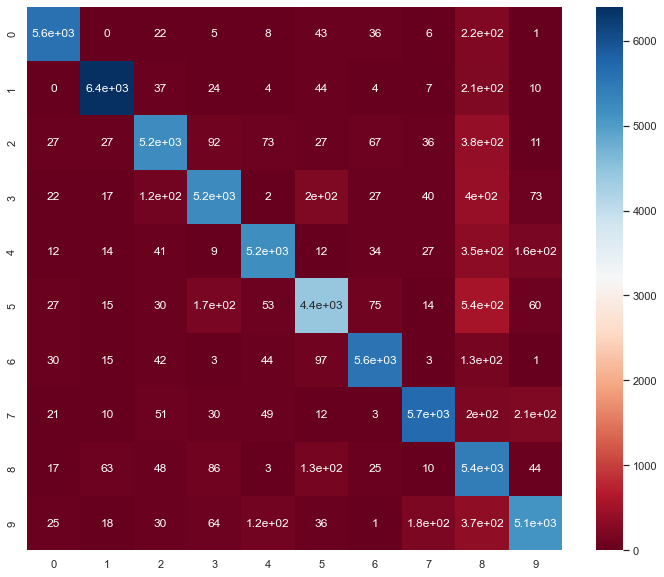

In [17]:
sns.set(rc={'figure.figsize':(12,10)})
sns.heatmap(cm3, annot=True, cmap="RdBu")

In [18]:
row_sums = cm3.sum(axis=1, keepdims=True)
norm_cm = cm3 / row_sums


<AxesSubplot:>

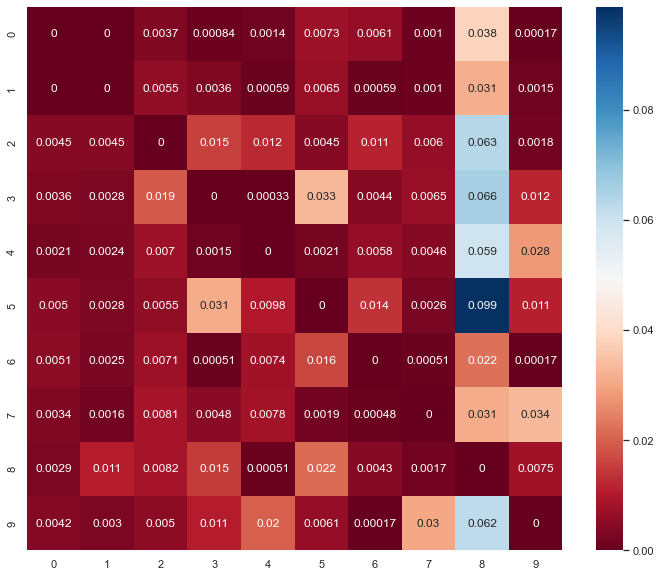

In [19]:
np.fill_diagonal(norm_cm, 0)
sns.heatmap(norm_cm, annot=True, cmap="RdBu")

In [20]:
cl_a, cl_b = 3, 5
x_aa = x_train[(y_train == cl_a) & (yp == cl_a)]
x_ab = x_train[(y_train == cl_a) & (yp == cl_b)]
x_ba = x_train[(y_train == cl_b) & (yp == cl_a)]
x_bb = x_train[(y_train == cl_b) & (yp == cl_b)]


In [21]:
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]

    ########
    if images_per_row == 0:
       images_per_row = 0.1
    else:
        images_per_row = images_per_row
        pass
    ########

    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = plt.cm.binary, **options)
    plt.axis("off")

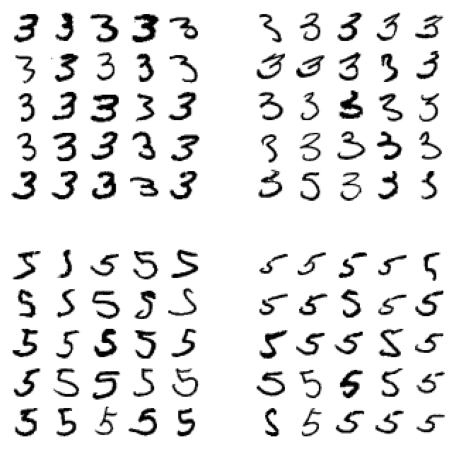

In [22]:
plt.figure(figsize=(8,8))
plt.subplot(221); plot_digits(x_aa[:25], images_per_row=5)
plt.subplot(222); plot_digits(x_ab[:25], images_per_row=5)
plt.subplot(223); plot_digits(x_ba[:25], images_per_row=5)
plt.subplot(224); plot_digits(x_bb[:25], images_per_row=5)
plt.show()


In [23]:
from sklearn.neighbors import KNeighborsClassifier
y_train_large = (y_train >= 7)
y_train_odd = (y_train % 2 == 1)
y_multilabel = np.c_[y_train_large, y_train_odd]
knn_cl = KNeighborsClassifier()
knn_cl.fit(x_train, y_multilabel)


KNeighborsClassifier()

In [24]:
 knn_cl.predict([a])


array([[False,  True]])

In [25]:
from sklearn.metrics import f1_score

y_train_knn_pred = cross_val_predict(knn_cl, x_train, y_multilabel, cv=3)
f1_score(y_multilabel, y_train_knn_pred, average="macro")

0.976410265560605

In [26]:
noise = np.random.randint(0, 100, (len(x_train), 784))
x_train_mod = x_train + noise
noise = np.random.randint(0, 100, (len(x_test), 784))
x_test_mod = x_test + noise
y_train_mod = x_train
y_test_mod = x_test

<Figure size 864x720 with 0 Axes>

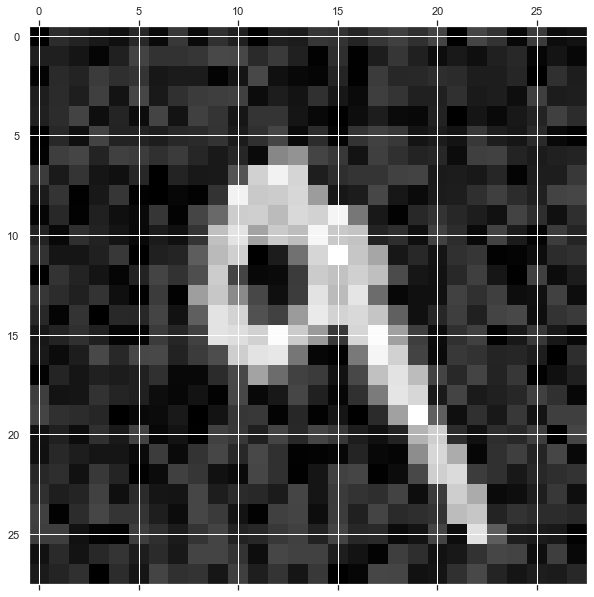

In [27]:
# the number after filled with noise
plt.gray()
b = x_test_mod[7]
b = b.reshape(28,28)
plt.matshow(b)

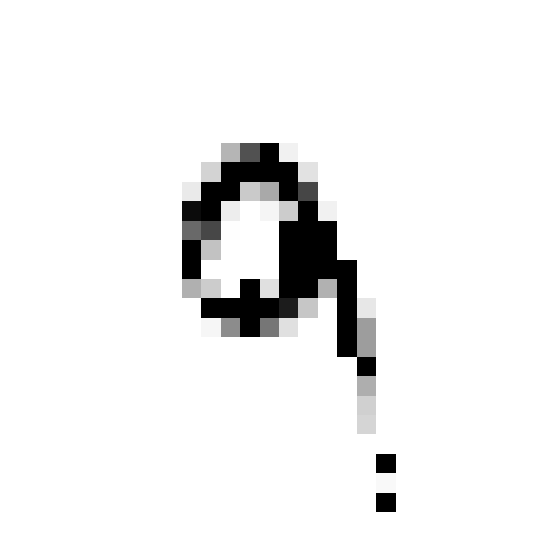

In [29]:
knn_cl.fit(x_train_mod, y_train_mod)
clean_digit = knn_cl.predict([x_test_mod[7]])
plot_digits(clean_digit)

In [30]:
import pickle as pk
pk.dump(sc, open('model.pkl', 'wb'))

In [42]:
mod = pk.load(open('model.pkl', 'rb'))
mod.predict([a])[0]

0